In [1]:
pip install nltk textblob gensim scikit-learn seaborn networkx wordcloud pandas matplotlib textstat

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Note: you may need to restart the 


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Pack

=== NLP Toolkit ===

Sentences: ['Natural Language Processing (NLP) enables computers to understand and process human language.', 'It involves tasks such as tokenization, stop-word removal, lemmatization, and POS tagging.', 'NLP has applications in machine translation, sentiment analysis, chatbots, and more.']
Sentence count: 3

Tokens: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'enables', 'computers', 'to', 'understand', 'and', 'process', 'human', 'language', '.', 'It', 'involves', 'tasks', 'such', 'as', 'tokenization', ',', 'stop-word', 'removal', ',', 'lemmatization', ',', 'and', 'POS', 'tagging', '.', 'NLP', 'has', 'applications', 'in', 'machine', 'translation', ',', 'sentiment', 'analysis', ',', 'chatbots', ',', 'and', 'more', '.']
Token count: 46

After Stop-word Removal: ['Natural', 'Language', 'Processing', 'NLP', 'enables', 'computers', 'understand', 'process', 'human', 'language', 'involves', 'tasks', 'tokenization', 'removal', 'lemmatization', 'POS', 'tagging', '

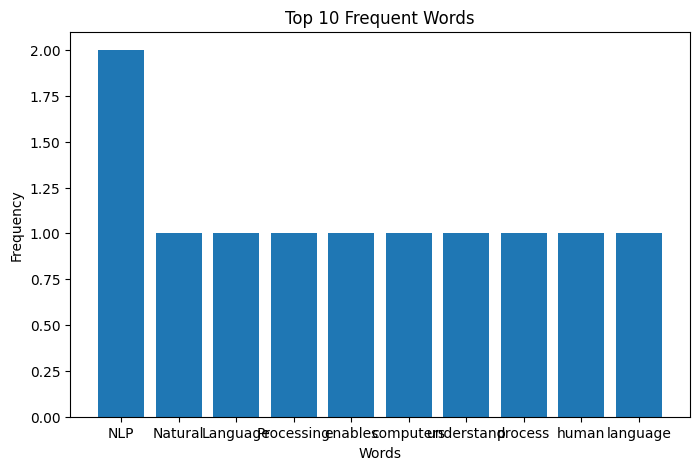

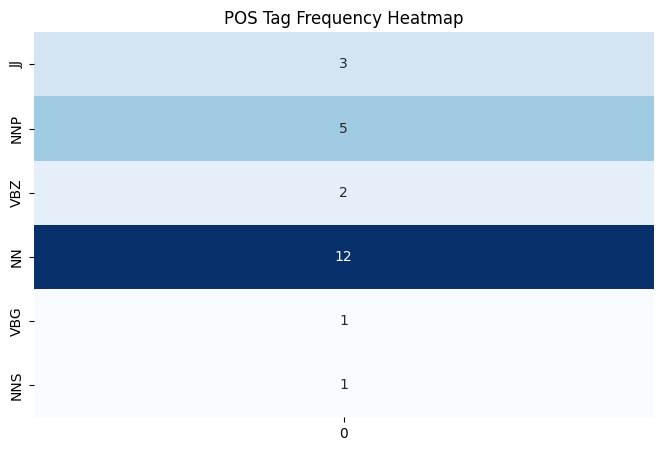

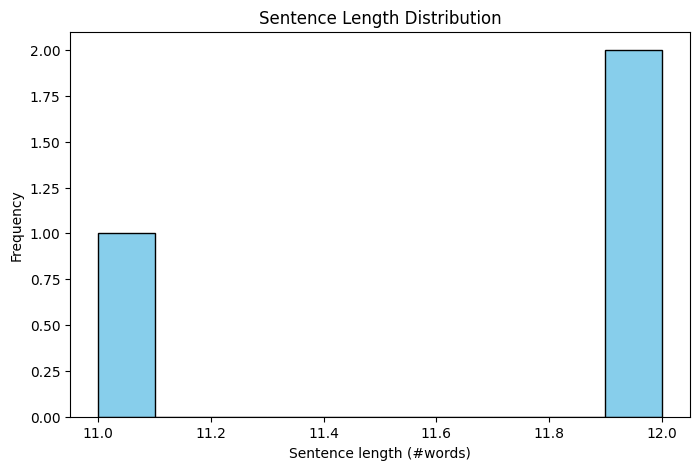

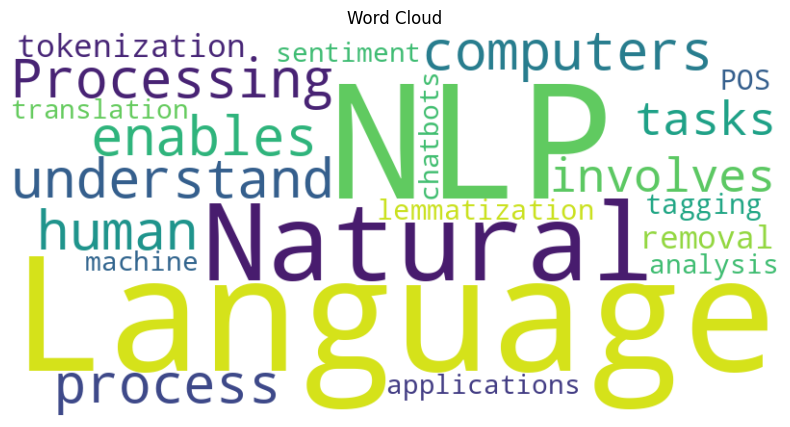

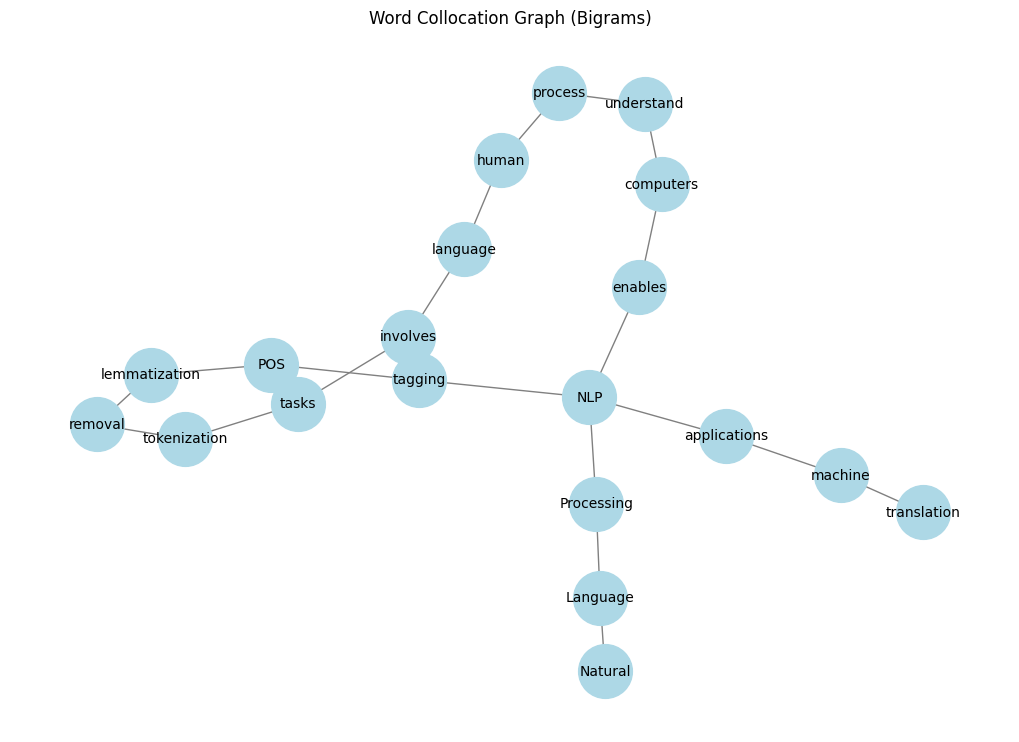


Results exported to nlp_results.csv ✅


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk, bigrams, trigrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import textstat
from textblob import TextBlob
import pandas as pd
import networkx as nx
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora, models

# === Download NLTK resources ===
# Tokenizers
nltk.download("punkt")
nltk.download("punkt_tab")

# Stopwords
nltk.download("stopwords")

# POS tagging
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")

# Lemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")

# Named Entity Recognition (NER)
nltk.download("maxent_ne_chunker")
nltk.download("words")
nltk.download("treebank")

# === INTERACTIVE INPUT ===
print("=== NLP Toolkit ===")
choice = input("Do you want to enter your own text? (y/n): ")
if choice.lower() == 'y':
    text = input("Enter your text: ")
else:
    with open("sample.txt", "r", encoding="utf-8") as f:
        text = f.read()


# 1. Sentence Tokenization
sentences = sent_tokenize(text)
print("\nSentences:", sentences)
print("Sentence count:", len(sentences))

# 2. Word Tokenization
tokens = word_tokenize(text)
print("\nTokens:", tokens)
print("Token count:", len(tokens))

# 3. Stop-word removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
print("\nAfter Stop-word Removal:", filtered_tokens)
print("Word count after stop-word removal:", len(filtered_tokens))

# 4. Vocabulary (Unique words)
vocabulary = set(filtered_tokens)
print("\nVocabulary (unique words):", vocabulary)
print("Vocabulary size |V|:", len(vocabulary))

# 5. Stemming & Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed = [stemmer.stem(word) for word in filtered_tokens]
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]
print("\nAfter Stemming:", stemmed)
print("After Lemmatization:", lemmatized)

# 6. Most frequent 10 words
freq = Counter(filtered_tokens).most_common(10)
print("\nTop 10 frequent words:", freq)

# 7. POS Tagging
pos_tags = pos_tag(lemmatized)
nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]
print("\nNouns:", nouns)
print("Adjectives:", adjectives)
print("Noun count:", len(nouns))
print("Adjective count:", len(adjectives))

# 8. Bigrams and Trigrams
bi_grams = list(bigrams(filtered_tokens))
tri_grams = list(trigrams(filtered_tokens))
print("\nBigrams:", bi_grams[:5])
print("Trigrams:", tri_grams[:5])

# 9. Named Entity Recognition (NER)
ner_tree = ne_chunk(pos_tags)
print("\nNamed Entities:")
print(ner_tree)

# 10. Term Frequency (TF)
tf = Counter(filtered_tokens)
print("\nTerm Frequency (TF):", tf)

# 11. Readability Score (Flesch Reading Ease)
readability = textstat.flesch_reading_ease(text)
print("\nFlesch Reading Ease Score:", readability)


# A. Text Statistics
avg_word_len = sum(len(w) for w in filtered_tokens) / len(filtered_tokens)
avg_sent_len = sum(len(s.split()) for s in sentences) / len(sentences)
lexical_diversity = len(vocabulary) / len(filtered_tokens)
hapax_legomena = [w for w, c in tf.items() if c == 1]

print("\n--- Text Statistics ---")
print("Average word length:", avg_word_len)
print("Average sentence length (words):", avg_sent_len)
print("Lexical diversity (unique/total):", lexical_diversity)
print("Hapax legomena count:", len(hapax_legomena))

# B. Sentiment Analysis
blob = TextBlob(text)
print("\n--- Sentiment Analysis ---")
print("Polarity ([-1,1]):", blob.sentiment.polarity)
print("Subjectivity ([0,1]):", blob.sentiment.subjectivity)

# C. TF-IDF and Cosine Similarity
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(sentences)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("\n--- TF-IDF Cosine Similarity Between Sentences ---")
print(cosine_sim)

# D. Topic Modeling (LDA)
tokenized_sentences = [[word.lower() for word in word_tokenize(sent) if word.isalnum() and word.lower() not in stop_words] for sent in sentences]
dictionary = corpora.Dictionary(tokenized_sentences)
corpus = [dictionary.doc2bow(text) for text in tokenized_sentences]
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)

print("\n--- Topics (LDA) ---")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx}: {topic}")


# Word Frequency Bar Chart
plt.figure(figsize=(8,5))
words, counts = zip(*freq)
plt.bar(words, counts)
plt.title("Top 10 Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

# POS Distribution Heatmap
pos_counts = Counter(tag for word, tag in pos_tags)
plt.figure(figsize=(8,5))
sns.heatmap([[pos_counts.get(tag, 0)] for tag in pos_counts],
            annot=True, yticklabels=list(pos_counts.keys()), cmap="Blues", cbar=False)
plt.title("POS Tag Frequency Heatmap")
plt.show()

# Sentence Length Distribution
sentence_lengths = [len(s.split()) for s in sentences]
plt.figure(figsize=(8,5))
plt.hist(sentence_lengths, bins=10, color='skyblue', edgecolor='black')
plt.title("Sentence Length Distribution")
plt.xlabel("Sentence length (#words)")
plt.ylabel("Frequency")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_tokens))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

# Collocation Graph (Bigrams)
G = nx.Graph()
for w1, w2 in bi_grams[:20]:
    G.add_edge(w1, w2)
plt.figure(figsize=(10,7))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=1500, edge_color="gray", font_size=10)
plt.title("Word Collocation Graph (Bigrams)")
plt.show()


df_results = pd.DataFrame({
    "Word": list(tf.keys()),
    "Frequency": list(tf.values())
})
df_results.to_csv("nlp_results.csv", index=False)
print("\nResults exported to nlp_results.csv ✅")
